
### About Dataset

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset. Data was collected for 50 days, from February 11th to March 31st, 2022. Data source was secondary data and was collected from Ease my trip website.


### Features

The various features of the cleaned dataset are explained below:
1. *Airline*: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. *Flight*: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. *Source City*: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. *Departure Time*: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. *Stops*: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. *Arrival Time*: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. *Destination City*: City where the flight will land. It is a categorical feature having 6 unique cities.
8. *Class*: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. *Duration*: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. *Days Left*: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. *Price*: Target variable stores information of the ticket price.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("data\Clean_Dataset.csv", index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#check missing value
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,NaN,NaN,NaN,26.004751,13.561004,1.0,15.0,26.0,38.0,49.0


### Let's check distribution

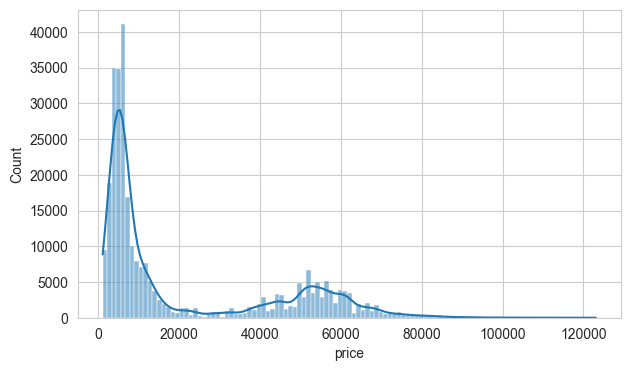

In [6]:
plt.figure(figsize=(7, 4))
sns.histplot(x ='price', data = df, kde = True)
plt.show()

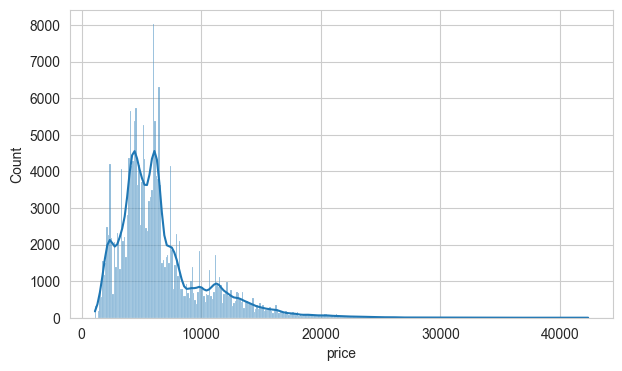

In [7]:
plt.figure(figsize=(7, 4))
sns.histplot(x ='price', data = df[df['class'] == 'Economy'], kde = True)
plt.show()

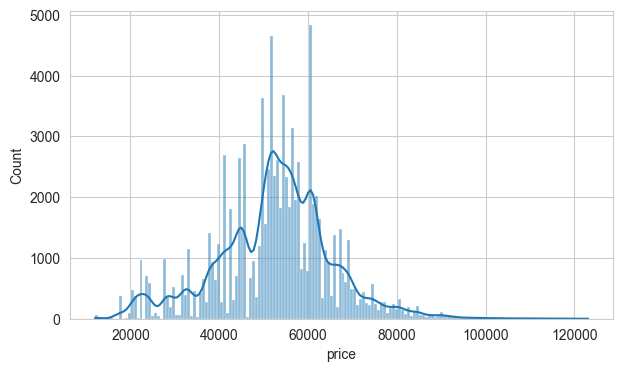

In [8]:
plt.figure(figsize=(7, 4))
sns.histplot(x ='price', data = df[df['class'] != 'Economy'], kde = True)
plt.show()

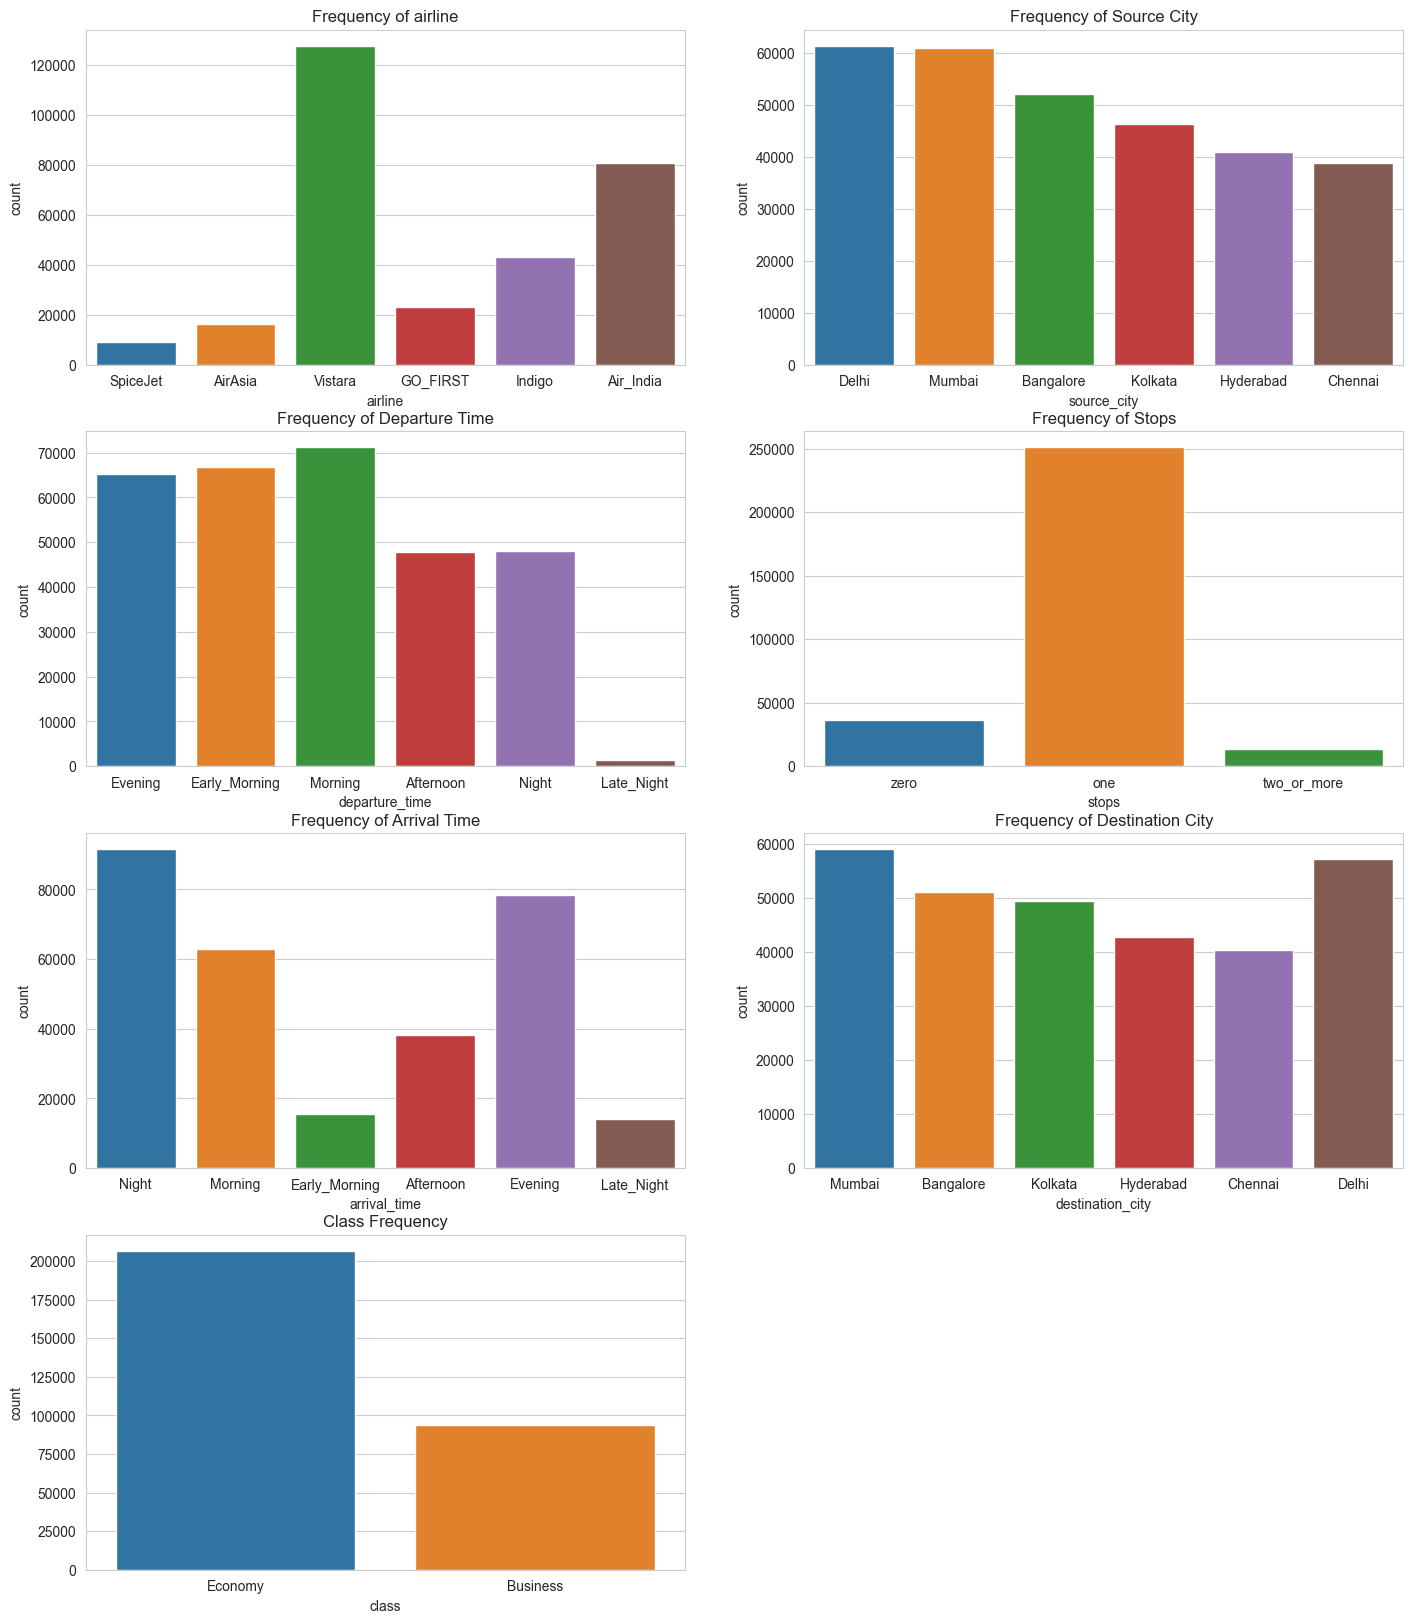

In [9]:
# visualization of catagoric features
plt.figure(figsize=(17, 20))

plt.subplot(4, 2, 1)
sns.countplot(x=df['airline'], data=df)
plt.title("Frequency of airline")

plt.subplot(4, 2, 2)
sns.countplot(x=df["source_city"], data=df)
plt.title("Frequency of Source City")

plt.subplot(4, 2, 3)
sns.countplot(x=df["departure_time"], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4, 2, 4)
sns.countplot(x=df["stops"], data=df)
plt.title("Frequency of Stops")

plt.subplot(4, 2, 5)
sns.countplot(x=df["arrival_time"], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4, 2, 6)
sns.countplot(x=df["destination_city"], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4, 2, 7)
sns.countplot(x=df["class"], data=df)
plt.title("Class Frequency")

plt.show()

### How does the ticket price vary between Economy and Business class?

To visualize the difference between the two kind of tickets, I will plot the prices for the two prices for both business and economy tickets for the different companies.

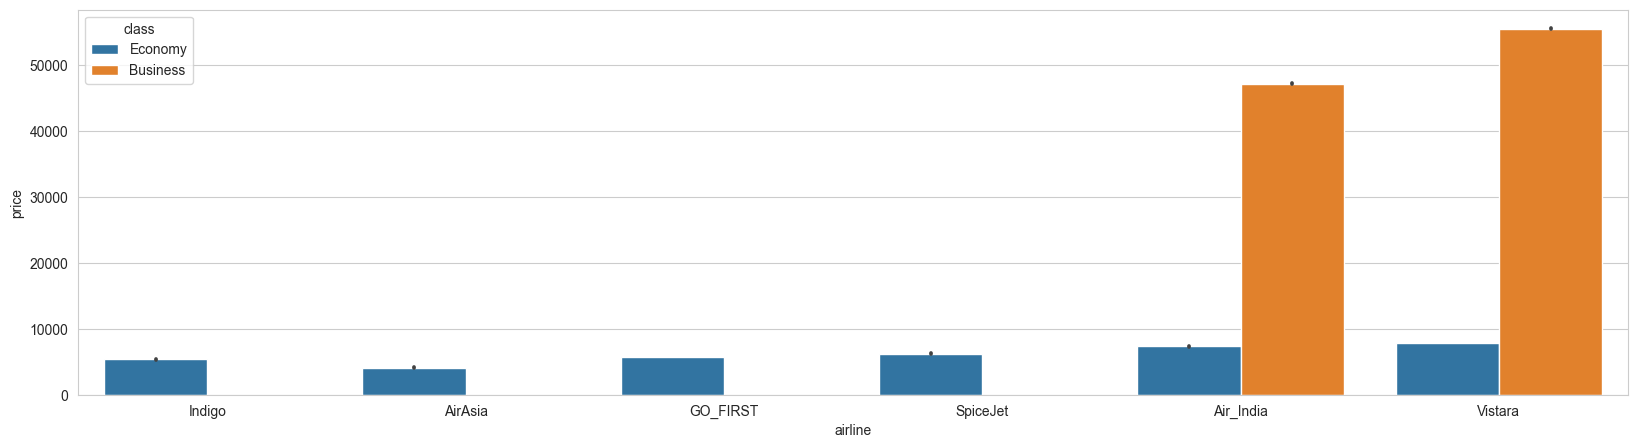

In [10]:
plt.figure(figsize=(20, 5))
sns.barplot(x='airline', y='price', hue="class",
            data=df.sort_values("price")
            )
plt.show()

📌 Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

To visualize how the prices changes depending on the number of days left, I will calculate the average price depending on the days left, to try to understand a pattern in the curve.

In [11]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
df_temp.head()

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368


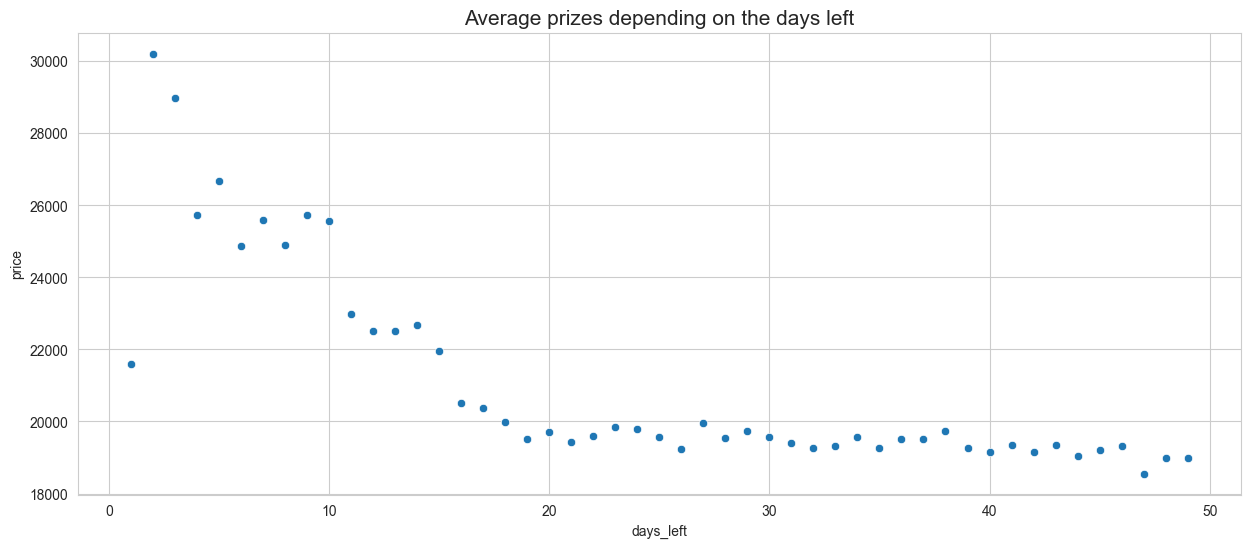

In [12]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left",
                     y="price", data=df_temp)
ax.set_title("Average prizes depending on the days left",fontsize=15)
plt.show()

### Does the price change with the duration of the flight?

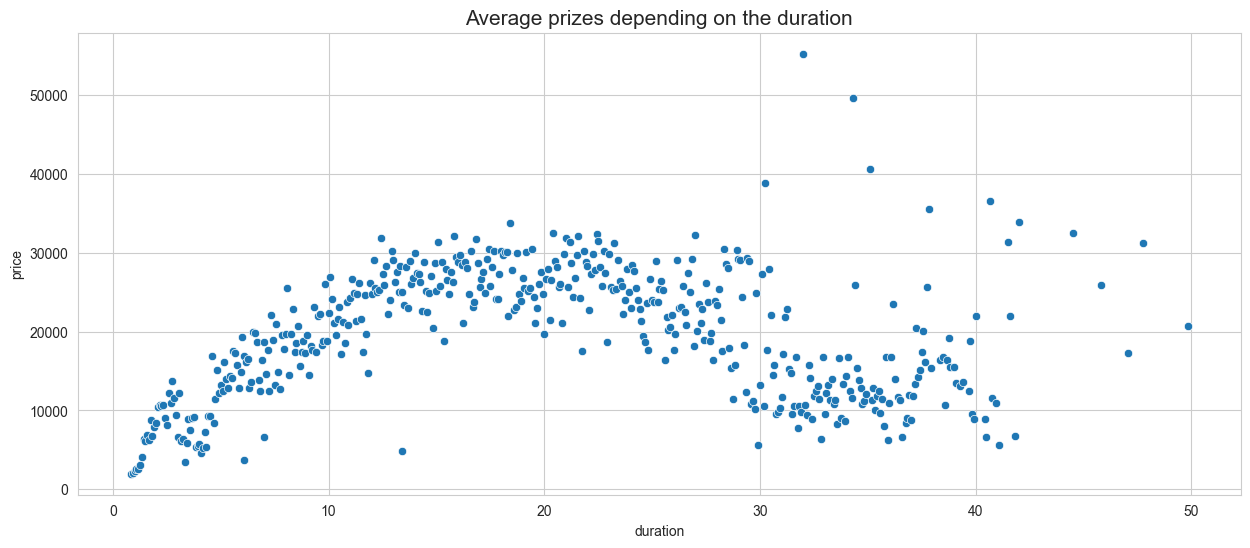

In [13]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp)
ax.set_title("Average prizes depending on the duration",fontsize=15)
plt.show()

📌 It is clear that here the relationship is not linear. The prices reaches a high price at a duration of 20 hours before lowering again.
However some outliers seem to affect the regression curve .

### Does ticket price change based on the departure time and arrival time?

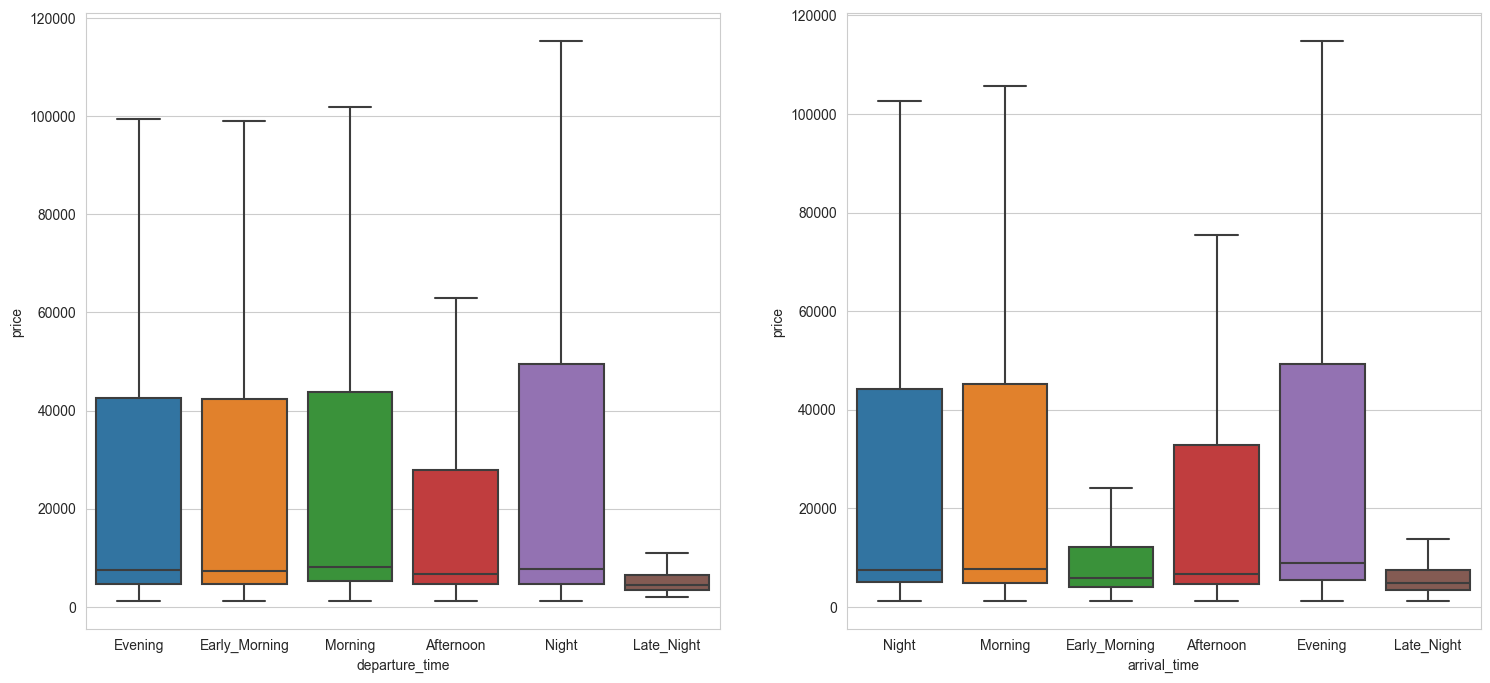

In [14]:
plt.figure(figsize = (18,8))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False)
ax.set_title("Airline prices based on the departure time",fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False)
ax.set_title("Airline prices based on the arrival time",fontsize=15)
plt.show()

### Does the number of stops influences the price?

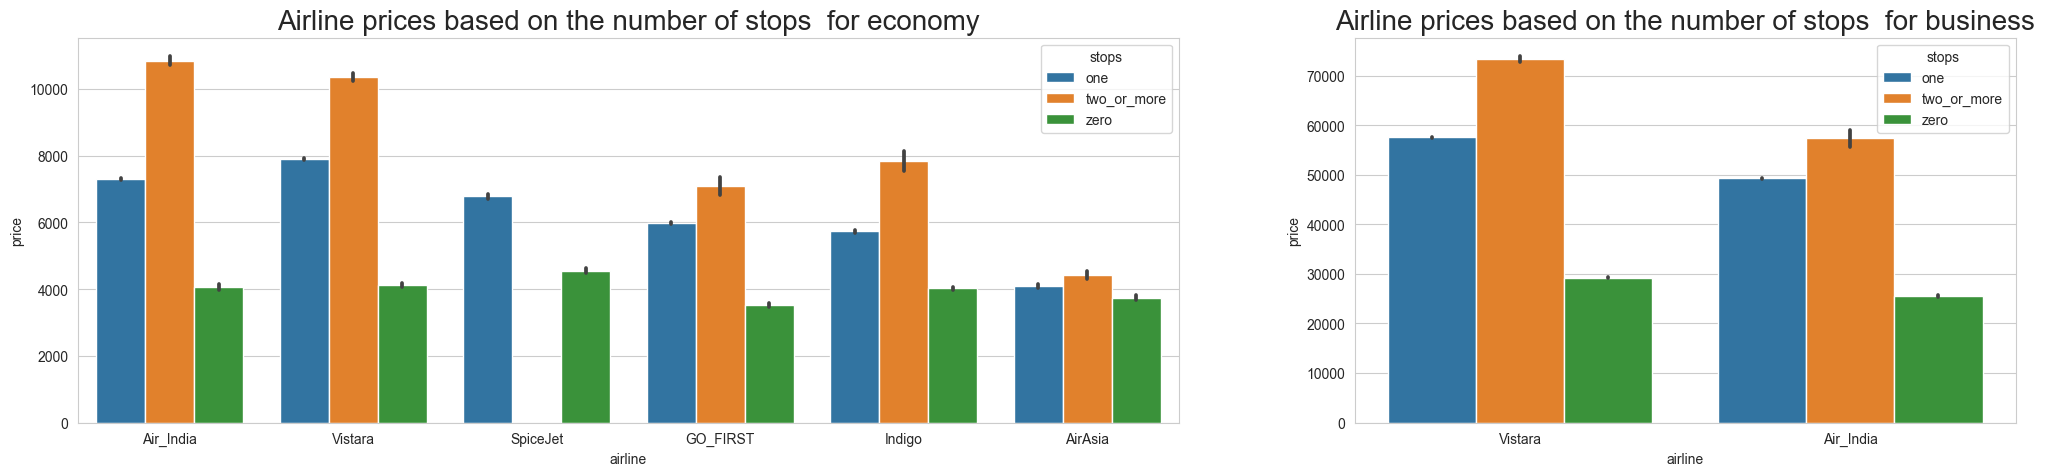

In [15]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)

sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

plt.show()

### Does price vary with Airlines?

To compare the prices between the companies we will only compare the same kind of tickets since the previous question showed that the class has a big impact on the final price.

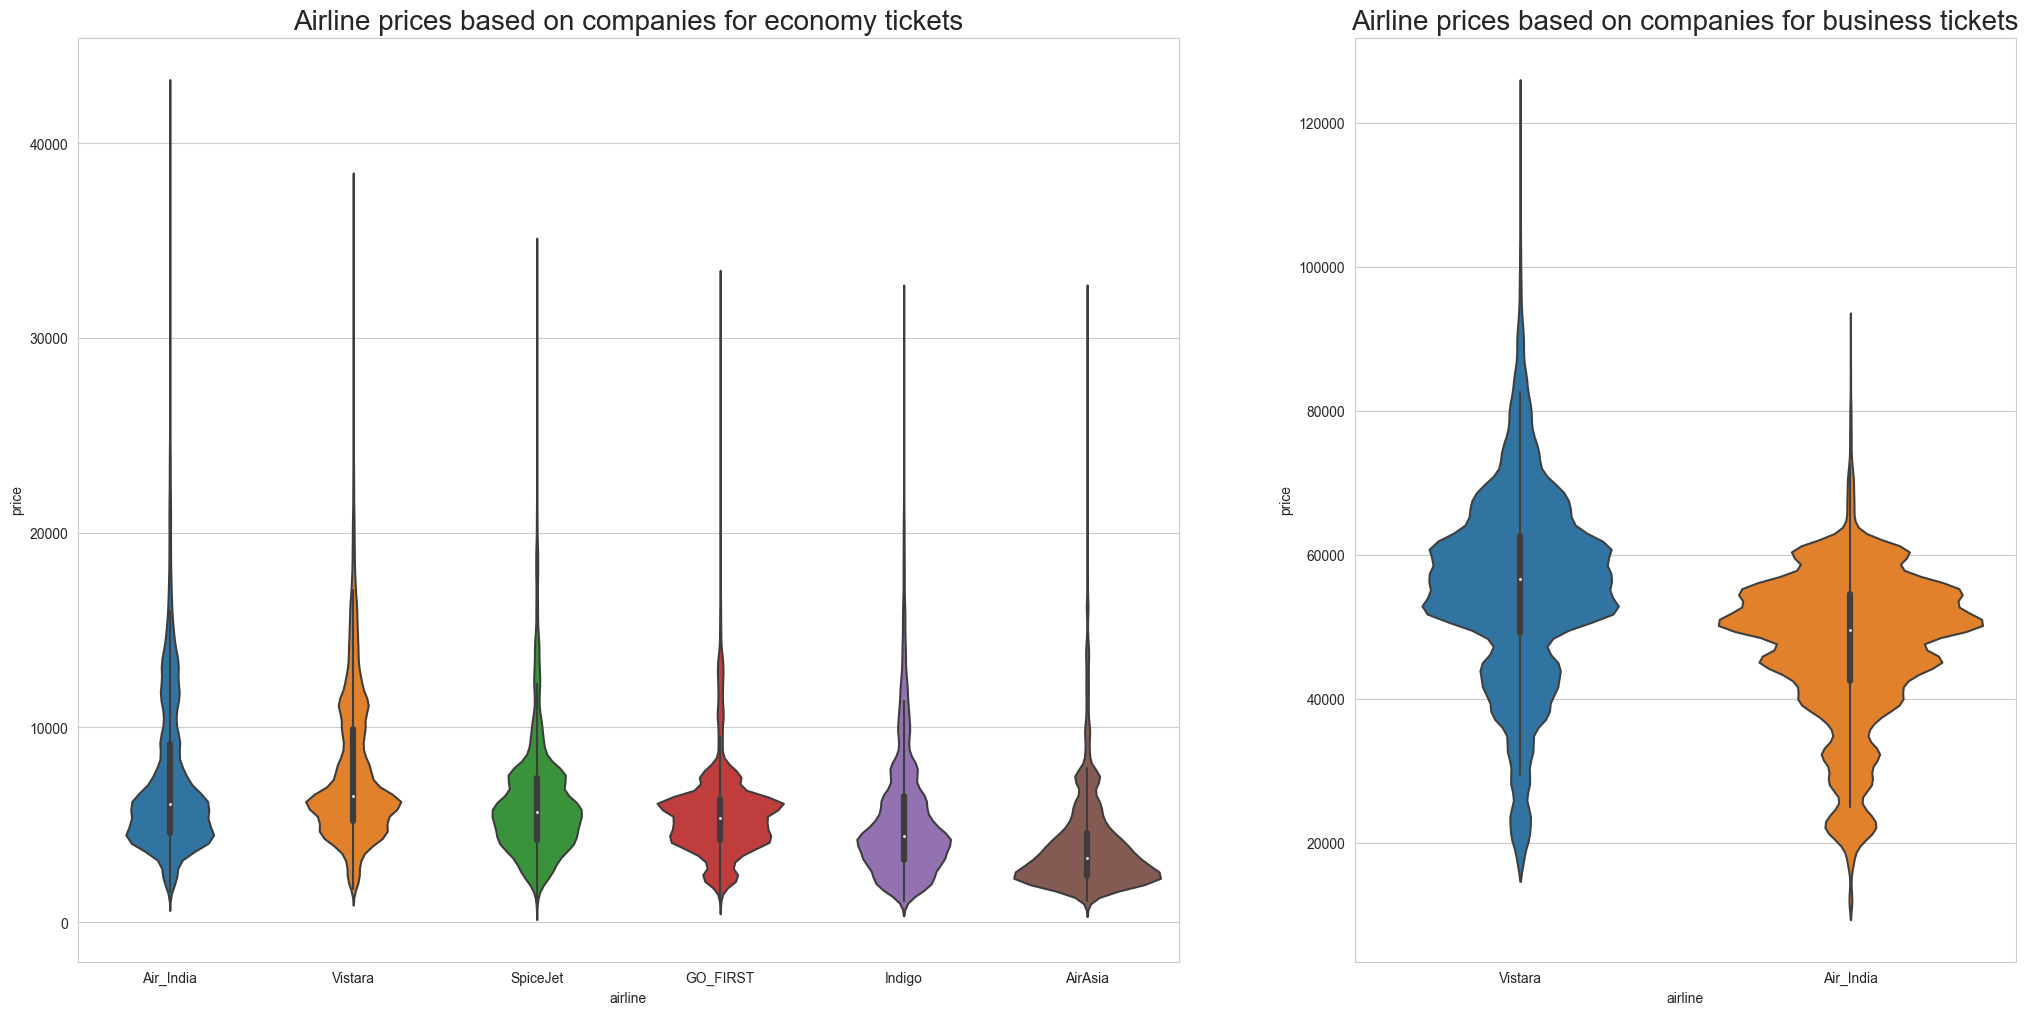

In [16]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 12))

sns.violinplot(y = "price", x = "airline",
               data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False),
               kind="boxen", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets",fontsize=20)

sns.violinplot(y = "price", x = "airline",
               data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False),
               kind="boxen", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets",fontsize=20)
plt.show()

### What variables influence most the price?

In [17]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)

    #One-hot encoding for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    return df

In [18]:
df_preprocessed = preprocessing(df)
print(df_preprocessed.head())

   stops  class  duration  days_left  price  airline_Air_India  \
0      0      0      2.17          1   5953              False   
1      0      0      2.33          1   5953              False   
2      0      0      2.17          1   5956              False   
3      0      0      2.25          1   5955              False   
4      0      0      2.33          1   5955              False   

   airline_GO_FIRST  airline_Indigo  airline_SpiceJet  airline_Vistara  ...  \
0             False           False              True            False  ...   
1             False           False              True            False  ...   
2             False           False             False            False  ...   
3             False           False             False             True  ...   
4             False           False             False             True  ...   

   departure_time_Early_Morning  departure_time_Evening  \
0                         False                    True   
1         

In [19]:
# check correlation
df_preprocessed.corr()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
stops,1.000000,0.001027,0.468059,-0.008540,0.119648,0.060215,-0.033363,-0.172133,-0.087293,0.098758,...,0.010145,-0.041882,-0.035366,0.052600,-0.058166,-0.018657,0.070912,-0.018544,-0.045666,0.017965
class,0.001027,1.000000,0.138710,-0.013039,0.937860,0.124899,-0.194540,-0.275477,-0.118325,0.302116,...,-0.012120,0.010789,-0.029378,0.002801,0.049516,-0.041974,0.032833,-0.086238,0.039745,0.008035
duration,0.468059,0.138710,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,...,-0.047092,0.104017,-0.045045,-0.071084,0.115464,0.010950,0.033094,-0.107301,0.122906,-0.064458
days_left,-0.008540,-0.013039,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,...,0.003322,-0.010238,0.012000,-0.003206,0.004004,0.020204,-0.013737,0.026500,-0.003619,-0.004593
price,0.119648,0.937860,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,...,-0.012232,0.007946,-0.033768,0.018199,0.041768,-0.060449,0.056408,-0.093602,0.030379,0.020344
airline_Air_India,0.060215,0.124899,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,...,0.033703,0.019692,-0.006956,-0.024826,0.010730,-0.025510,-0.040356,-0.059937,0.066735,-0.001920
airline_GO_FIRST,-0.033363,-0.194540,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,...,0.028405,-0.003699,0.008566,-0.040410,-0.025366,0.085654,-0.043881,0.100450,-0.063926,-0.000382
airline_Indigo,-0.172133,-0.275477,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,...,-0.032224,-0.020572,0.077697,0.028371,-0.072394,0.013864,0.007335,0.065025,-0.082781,-0.009271
airline_SpiceJet,-0.087293,-0.118325,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,...,0.033931,0.003626,-0.011630,-0.028322,0.005247,0.022834,-0.042162,0.003302,0.030808,0.013312
airline_Vistara,0.098758,0.302116,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,...,-0.036206,-0.005037,-0.056948,0.056992,0.042486,-0.058766,0.091317,-0.135247,0.030260,0.024874


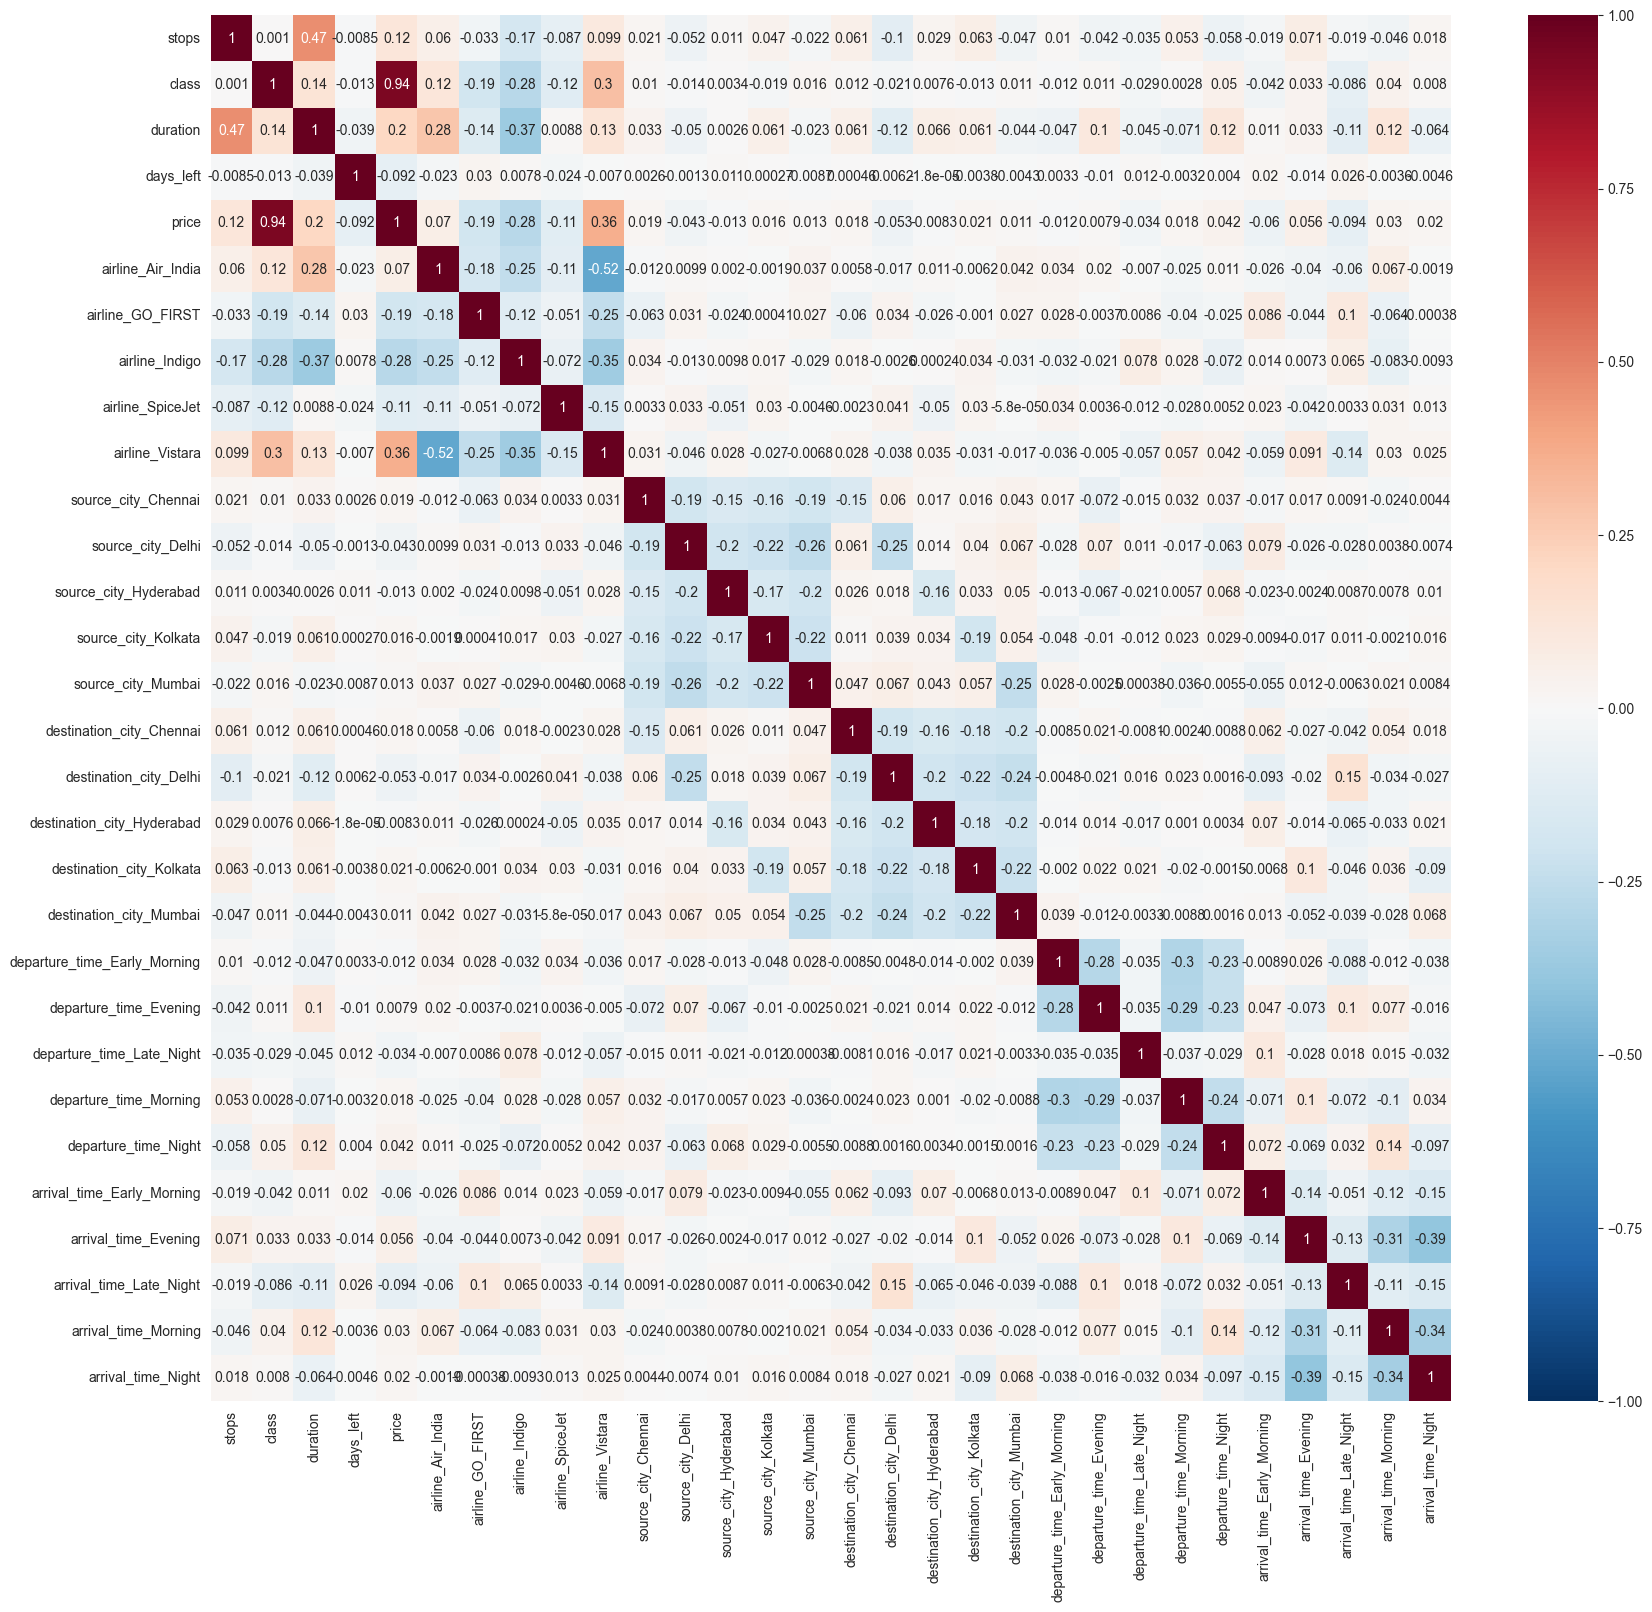

In [20]:
plt.figure(figsize = (20, 18))
sns.heatmap(df_preprocessed.corr(), annot = True,
            vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')
plt.show()

### Basic prediction without any tuning and feature engineering

In [21]:
X = df_preprocessed.copy()
y = X.pop("price")

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=1,
                                                test_size=0.3, shuffle=True)

In [24]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

models = {}
models["LinearRegression"]={"model":LinearRegression()}
models["KNeighborsRegressor"]={"model":KNeighborsRegressor()}
models["XGBRegressor"]={"model":XGBRegressor()}
models["CatBoostRegressor"]={"model":CatBoostRegressor()}



In [25]:
models

{'LinearRegression': {'model': LinearRegression()},
 'KNeighborsRegressor': {'model': KNeighborsRegressor()},
 'XGBRegressor': {'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...)},
 'CatBoostRegressor': {'model': <catboost.core.CatBoostRegressor at 0x1563bafdd90>}}

In [26]:
for name, model in models.items():
    trained_model = model["model"].fit(x_train, y_train)
    y_pred = trained_model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred )
    print("--- "+name+" ---")
    print(f"mean_absolute_error: {mae}")

--- LinearRegression ---
mean_absolute_error: 4487.32916605329
--- KNeighborsRegressor ---
mean_absolute_error: 7793.344286253693
--- XGBRegressor ---
mean_absolute_error: 1989.7447812155558
Learning rate set to 0.095307
0:	learn: 20696.8887510	total: 268ms	remaining: 4m 27s
1:	learn: 18880.3968770	total: 337ms	remaining: 2m 48s
2:	learn: 17250.2235763	total: 412ms	remaining: 2m 17s
3:	learn: 15797.9185937	total: 483ms	remaining: 2m
4:	learn: 14489.3811339	total: 571ms	remaining: 1m 53s
5:	learn: 13328.6926819	total: 702ms	remaining: 1m 56s
6:	learn: 12301.1203183	total: 902ms	remaining: 2m 7s
7:	learn: 11377.7276068	total: 1.08s	remaining: 2m 13s
8:	learn: 10557.8842404	total: 1.15s	remaining: 2m 7s
9:	learn: 9837.0657763	total: 1.23s	remaining: 2m 2s
10:	learn: 9200.0857406	total: 1.29s	remaining: 1m 56s
11:	learn: 8631.5787401	total: 1.39s	remaining: 1m 54s
12:	learn: 8142.7394455	total: 1.44s	remaining: 1m 49s
13:	learn: 7712.5622227	total: 1.5s	remaining: 1m 45s
14:	learn: 7346.15